In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

!ls

mm_agn_clusters.ipynb  mm_hmf_clusters.ipynb  mm_merge_photons.ipynb  README.md


# AGNs

In [9]:
data_name = "../data/eROSITA_cluster_agn_box2hr/agn_092.dat"
headers1 = ["ID", 
            "x [kpc/h]", 
            "y [kpc/h]", 
            "z[kpc/h]", 
            "M [Msol]", 
            "Mdot [Msol/year]", 
            "Lbol [erg/s]", 
            "Lsoftx [erg/s]", 
            "Lhard [erg/s]", 
            "f_obs"]
table1 = pd.read_csv(data_name, comment='#', header=None, sep='\s+', names=headers1)
table1

,ID,x [kpc/h],y [kpc/h],z[kpc/h],M [Msol],Mdot [Msol/year],Lbol [erg/s],Lsoftx [erg/s],Lhard [erg/s],f_obs
0,0,240134.23000,278604.62,216048.58,39442900.0,0.000095,5.980697e+41,5.099707e+40,7.828258e+40,1.000000
1,1,238934.14000,278966.09,216201.14,132927000.0,0.000101,6.380837e+41,5.418299e+40,8.306542e+40,1.000000
2,2,238487.81000,278987.03,216040.61,79275000.0,0.000214,1.352523e+42,1.086058e+41,1.640156e+41,1.000000
3,3,237887.23000,277908.97,216132.50,67656000.0,0.000628,3.964621e+42,2.871005e+41,4.243506e+41,0.935222
4,4,236814.19000,278410.41,216421.95,101353000.0,0.000999,6.303717e+42,4.331131e+41,6.342556e+41,0.885045
...,...,...,...,...,...,...,...,...,...,...
362237,390241,1199.33250,148509.62,158785.95,137284000.0,0.000207,1.307974e+42,1.053215e+41,1.591622e+41,1.000000
362238,390243,918.27228,147657.55,160155.78,135256000.0,0.000421,2.658653e+42,2.006838e+41,2.990020e+41,0.978924
362239,390244,800.08716,146986.00,160445.52,114989000.0,0.000192,1.212590e+42,9.824784e+40,1.486975e+41,1.000000
362240,390245,9111.28420,152372.50,155277.52,82102500.0,0.000296,1.869630e+42,1.459404e+41,2.189755e+41,1.000000


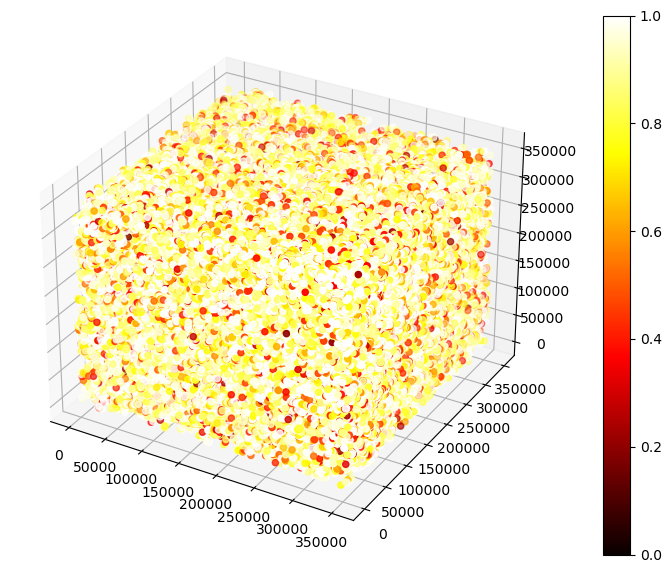

In [10]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table1.to_numpy().astype(float)

x = data_table[:,1]
y = data_table[:,2]
z = data_table[:,3]
c = data_table[:,9]

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# CLUSTERS

In [11]:
data_name = "../data/eROSITA_cluster_agn_box2hr/cluster_092.dat"
headers2 = ["ID",
            "x [kpc/h]", 
            "y [kpc/h]",
            "z[kpc/h]",
            "Mvir [Msol/h]", 
            "M200m [Msol/h]",
            "M500m [Msol/h]", 
            "M200c [Msol/h]", 
            "M500c [Msol/h]", 
            "R500c [kpc/h]",
            "Mgas_500c [Msol/h]",  
            "Mstar_500c [msol/h]", 
            "T_500c [keV]",
            "Lx_500c [1e44 erg/s]"]
  
table2 = pd.read_csv(data_name, comment='#', sep='\s+', header=None, names=headers2)
table2

,ID,x [kpc/h],y [kpc/h],z[kpc/h],Mvir [Msol/h],M200m [Msol/h],M500m [Msol/h],M200c [Msol/h],M500c [Msol/h],R500c [kpc/h],Mgas_500c [Msol/h],Mstar_500c [msol/h],T_500c [keV],Lx_500c [1e44 erg/s]
0,0,209662.89,204439.160,350198.380,1.291030e+15,1.353640e+15,8.768320e+14,1.066300e+15,6.381420e+14,1317.500,8.039430e+13,1.828060e+13,6.79982,28.828400
1,1,315504.91,24307.531,278968.970,6.596320e+14,6.963740e+14,4.933810e+14,5.734760e+14,3.555280e+14,1084.090,4.279230e+13,1.029420e+13,5.00653,8.318200
2,2,327344.81,231334.050,209859.410,5.868580e+14,6.261910e+14,4.266780e+14,4.803030e+14,3.455940e+14,1073.870,4.230100e+13,8.609530e+12,5.30121,13.241600
3,3,250312.62,124154.620,152601.860,6.100200e+14,6.539930e+14,4.571940e+14,5.200830e+14,3.548280e+14,1083.380,3.800410e+13,1.197950e+13,5.52798,6.703500
4,4,228365.23,251743.360,37959.930,4.529730e+14,4.855830e+14,3.415140e+14,3.900380e+14,2.746690e+14,994.725,2.981750e+13,1.017560e+13,4.79817,5.777400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,633,310383.62,23657.348,52717.359,7.255710e+13,7.624380e+13,5.966020e+13,6.474390e+13,5.082570e+13,566.838,4.502600e+12,1.537580e+12,1.47042,0.306448
393,640,254069.62,323948.190,113528.680,7.916330e+13,8.101860e+13,6.878390e+13,7.459810e+13,5.720840e+13,589.649,5.763540e+12,1.565750e+12,1.50931,0.574427
394,641,282823.16,197597.220,162560.380,8.053650e+13,8.280380e+13,6.744130e+13,7.380510e+13,5.089760e+13,567.110,4.559750e+12,1.361160e+12,1.44538,0.265205
395,653,327764.91,298013.000,295632.530,8.146270e+13,8.457510e+13,6.641930e+13,7.345440e+13,5.436640e+13,579.707,4.288360e+12,1.692740e+12,1.68373,0.272670


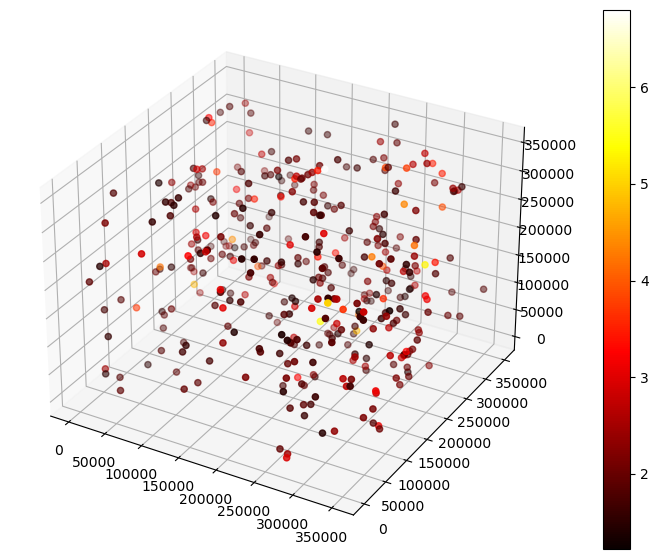

In [12]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table2.to_numpy().astype(float)

x = data_table[:,1]
y = data_table[:,2]
z = data_table[:,3]
c = data_table[:,12]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# SCALING RELATIONS

z = 0.5181775

<Figure size 640x480 with 0 Axes>

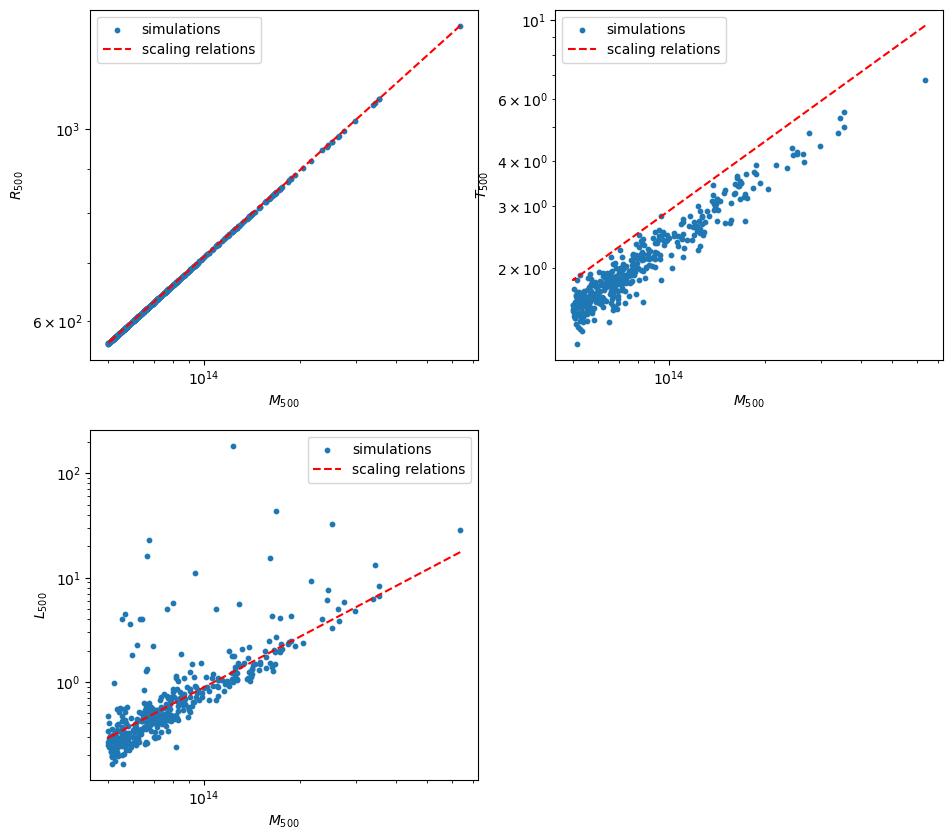

In [35]:
%run -i '../functions.py'

plt.figure(figsize=(11, 10))

M500s = table2["M500c [Msol/h]"]
R500s = table2["R500c [kpc/h]"]
T500s = table2["T_500c [keV]"]
L500s = table2["Lx_500c [1e44 erg/s]"]

zzz = [0.5181775]*len(M500s)
R500s_rel = R500(M500s, zzz)
T500s_rel = T_X(M500s, zzz)
L500s_rel = L_X(M500s, zzz, 0.704)

plt.subplot(221)
plt.scatter(M500s, R500s, s=10, label = 'simulations')
plt.plot(M500s, R500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}$")
plt.ylabel("$R_{500}$")
plt.legend()

plt.subplot(222)
plt.scatter(M500s, T500s, s=10, label = 'simulations')
plt.plot(M500s, T500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}$")
plt.ylabel("$T_{500}$")
plt.legend()

plt.subplot(223)
plt.scatter(M500s, L500s, s=10, label = 'simulations')
plt.plot(M500s, L500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}$")
plt.ylabel("$L_{500}$")
plt.legend()

plt.show()